In [3]:
import json
import pandas as pd
import gzip

# To count frequency in lists
import collections

# For graphing
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [1]:
# This is for showing or hiding code
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [4]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l.decode('utf-8'))

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

# This file contains reviews for all categories in Cell Phone Electronics within the one-year time frame
df = getDF('/Users/yujinglai/Dropbox/Eugenie/data/new_amazon_cell_phone_accessories/meta_Cell_Phones_and_Accessories.json.gz')

In [5]:
# Drop irrelevant columns
df.drop(['image', 'feature', 'also_buy', 'also_view', 'similar_item', 'date', 'details', 'tech1', 'tech2', 'fit'], axis=1, inplace=True)

# Drop records with nan in category
df = df.dropna(subset=['category'])

In [2]:
#print("There are %d products" % len(df.index))

In [10]:
# All records have the same category labels
#cats = []
#df['category'].apply(lambda x: cats.extend(x))
#print("There are %d unique subcategories" % len(set(cats)))

In [9]:
#print("There are %d subcategory appearances in total" % len(cats))

In [8]:
# All records have the same category labels
df['main_cat'] = df['main_cat'].apply(str)
main_cats = list(df['main_cat'])
#print("There are %d unique main_cats" % len(set(main_cats)))

In [27]:
# Count the frequency of each subcategory in the list
counter_main = collections.Counter(main_cats) # Ordered by freq
counter_main = {k: v for k, v in reversed(sorted(counter_main.items(), key=lambda item: item[1]))}

## Histograms of Subcategories of Cellphone & Electronics Products 
### Basic stats
* There are 534651 products with at least one subcategory label
* There are 4911 unique subcategories from **categories** column, which is a list of labels. It seems that it allows producers to create their own category labels so only ~30 labels are used by over 30 products. See histogram below
* There are 1455752 subcategory appearances in total in **categories** column
* There are 34 unique subcategories from **main_cats** column, which contains only one label

### Head of the data frame

In [11]:
df.head()

,category,description,title,brand,rank,main_cat,asin,price
0,"[Cell Phones & Accessories, Accessories, Selfi...","[If you've searched monopod amazon, monopod ip...",90 Degree Twist-lock Extendable Pole for Photo...,Bonison,">#2,181,607 in Cell Phones & Accessories (See ...",Cell Phones & Accessories,0220132968,NaN
1,"[Cell Phones & Accessories, Accessories, Scree...",NaN,Fairy Tales (Doodle Art),Fitquipment,">#7,432,623 in Cell Phones & Accessories (See ...",Cell Phones & Accessories,0843165685,NaN
2,"[Cell Phones & Accessories, Accessories, Scree...","[, Item:Half-Black Galaxy S9 PlusScratch termi...","[2-Pack] Galaxy S9 Plus Screen Protector,Cafet...",Cafetec,">#2,969 in Cell Phones & Accessories (See Top ...",Cell Phones & Accessories,0857757652,$9.99
3,"[Cell Phones & Accessories, Accessories, Scree...","[, Item:Half-Black Galaxy S9 PlusScratch termi...","[2-Pack] Galaxy S9 Plus Screen Protector,Cafet...",Cafetec,">#2,969 in Cell Phones & Accessories (See Top ...",Cell Phones & Accessories,0865815194,$9.99
4,"[Cell Phones & Accessories, Accessories, Car A...",[Volume I focuses on the center of the body in...,Get Stronger by Stretching with Thera Band Vol...,Noa Spector-Flock,"920,439inMoviesTV(",Movies & TV,087127244X,NaN


### Histogram and labels from main_cat column

Text(0,0.5,'Number of products')

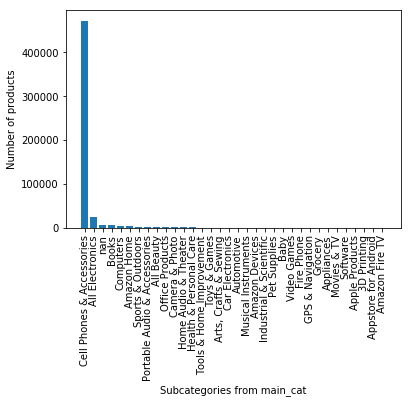

In [37]:
plt.bar(counter_main.keys(), counter_main.values())
plt.xticks(rotation=90)
plt.xlabel("Subcategories from main_cat")
plt.ylabel("Number of products")

All subcategories in main_cat column. There're 34 in total.

In [8]:
set(main_cats)

{'3D Printing',
 'All Beauty',
 'All Electronics',
 'Amazon Devices',
 'Amazon Fire TV',
 'Amazon Home',
 'Apple Products',
 'Appliances',
 'Appstore for Android',
 'Arts, Crafts & Sewing',
 'Automotive',
 'Baby',
 'Books',
 'Camera & Photo',
 'Car Electronics',
 'Cell Phones & Accessories',
 'Computers',
 'Fire Phone',
 'GPS & Navigation',
 'Grocery',
 'Health & Personal Care',
 'Home Audio & Theater',
 'Industrial & Scientific',
 'Movies & TV',
 'Musical Instruments',
 'Office Products',
 'Pet Supplies',
 'Portable Audio & Accessories',
 'Software',
 'Sports & Outdoors',
 'Tools & Home Improvement',
 'Toys & Games',
 'Video Games',
 'nan'}

### Histogram and labels from categories column
Top 30 subcategories in categories column.

In [11]:
# Count the frequency of each subcategory in the list
counter = collections.Counter(cats) # Ordered by freq

In [12]:
# Get the top 30 subcategories
tops = list(counter.keys())
tops = tops[0:29]
tops

['Cell Phones & Accessories',
 'Accessories',
 'Selfie Sticks & Tripods',
 'Screen Protectors',
 'Car Accessories',
 'Car Cradles & Mounts',
 'Cables',
 'Chargers & Power Adapters',
 'Wall Chargers',
 'Batteries & Battery Packs',
 'Portable Power Banks',
 'Accessory Kits',
 'Cases, Holsters & Sleeves',
 'Replacement Batteries',
 'Virtual Reality Headsets',
 'Basic Cases',
 'Mounts & Stands',
 'Stands',
 'Car Chargers',
 'Armbands',
 'Holsters',
 'Flip Cases',
 'Cell Phones',
 'Unlocked Cell Phones',
 'Phone Charms',
 'Car Kits',
 'Battery Charger Cases',
 'Solar Chargers',
 'Replacement Parts']

In [19]:
counter_tops = {k: counter[k] for k in tops}

In [25]:
counter_tops = {k: v for k, v in reversed(sorted(counter_tops.items(), key=lambda item: item[1]))}

Text(0,0.5,'Number of products')

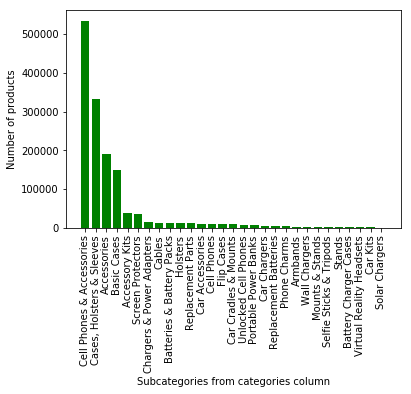

In [38]:
plt.bar(counter_tops.keys(), counter_tops.values(), color='g')
plt.xticks(rotation='vertical')
plt.xlabel("Subcategories from categories column")
plt.ylabel("Number of products")